### L1, L2 Loss Functions, Bias and Regression

In the previous notebook we reviewed linear regression from a data science perspective. The regression task was roughly as follows: 1) we're given some data, 2) we guess a basis function that models how the data was generated (linear, polynomial, etc), and 3) we chose a loss function to find the line of best fit. We saw how using the sum of squares gives us the Ordinary Least Squares problem; given $N$ data samples, the loss function $\mathcal{L}$ looked like,<p>


<center> $\mathcal{L}(y, \hat{y}) = \sum_{i = 1}^{N} (y_{i} - \hat{y}_{i})^{2}$. </center>

This may look familiar; this is essentially the equation of the magnitude of a vector, or the Euclidean distance, otherwise known as the L2 norm, which we saw briefly in the previous notebook. For a real vector $v$ with $n$ dimensions, this is defined as,

<center> $||v||_{2} := \sqrt{\sum_{i = 1}^{n} v_{i}^{2}}$, </center>

where each $v_{i}$ is a dimension of the vector $v$. If the error $e = y - \hat{y}$, then the loss function $\mathcal{L} = ||e||^{2}_{2}$ is the square of the L2 norm of the vector of errors. It's helpful to represent data as matrices, and errors as vectors, as there are many norms we can choose from to be loss functions. Using, and as we will see, _combining_ different norms have different effects on the outcomes of the regression problem. We'll look at a few in this notebook.

<center>Fig. 1</center>
<img src="figs/outlier.png" alt="Effect of an outlier on the OLS solution without a bias term" width="400"/>

In the previous homework assignment, we saw how a single outlier has a large effect on the value of the linear model's coefficients that we solve for, like in Fig. 1 above. That's because the loss of a single data point increases _as the square_ of the difference between the model's output and the data value. The outlier's influence comes from the power of the difference, so let's reduce the power; the L1-norm is defined as,

<center>$||v||_{1} = \sum_{i = 1}^{N} |v_{i}|$</center>

The L1-norm (sometimes called the Taxi-cab or Manhattan distance) is the sum of the absolute values of the dimensions of the vector. It turns out that if we just use the L1-norm as our loss function, however, there is no unique solution to the regression problem, but we _can_ combine it with the ordinary least squares regression problem. We can imagine that between two points A and B there's a unique shortest straight line distance (with distance equal to the L2-norm), but multiple paths with equal Manhattan distance (the sum of the absolute values of the x component and y component), as illustrated in Fig. 2.

<center>Fig. 2: [Image source](https://en.wikipedia.org/wiki/Taxicab_geometry#/media/File:Manhattan_distance.svg)</center>
<img src="figs/taxicab.png" alt="Taxi-cab metric drawing from Wikipedia" width="300"/>

The LASSO regression problem uses a loss function that combines the L1 and L2 norms, where the loss function is equal to,

<center>$\mathcal{L}_{LASSO}(Y, \hat{Y}) = ||Xw - Y||^{2}_{2} + \lambda||w||_{1}$</center>

for a paramter $\lambda$ that we set. This loss function has many useful properties we'll explore in the coming assignments. Notice that the first term of the loss function is the OLS formulation from the first assignment. The _second_ term is called a regularizer because the norm is acting on the weights; not the error. The larger the coeffecients $w$, the larger the penalty incurred by the loss function. 

There are all kinds of [regularization](https://en.wikipedia.org/wiki/Regularization) combining different norms, but LASSO regression is particularly useful. In the assignment questions jump right in and compare the outputs in our outlier problem.

### Bias

In the first notebook, when we introduced linear regression we glossed over bias. Let's go over what we mean by bias and how to incoporate it into a regression problem. Previoius we saw that in linear regression we need to find weight estimates $w$ such that $w$ minimzes $\mathcal{L}(y, \hat{y})$ where in vector notation for $k$ dimensional $x$,

<center>$\hat{y} = w^{T}x$</center>

Recall that the equation of a line in one dimension is $y = w_1x + w_2$. The $w_2$ is a linear bias term because it translates the entire model up and down along the depend axis, $y$. We use $w_1$ and $w_2$, rather than the traditional $m$ and $b$ because we can represent a linear bias term in vector notation easily. If we write the two dimensional vectors, $\vec{w} = <w_1, w_2>$, and $\vec{x} = <x, 1>$, the dot product looks like

<center>$\vec{w}^{T}\vec{x} = w_1 \cdot x + w_2\cdot 1$,</center>

which is precisely the equation of a line with a bias term that we were after. Oftentimes in machine learning you might see the OLS loss function written like,

<center>$\mathcal{L}(y, \hat{y}) = \sum_{i=1}^{n} ||w_1^{T}x_{n} + w_{2} - y_{n}||_{2}^{2}$.</center>

This is inconvenient because when we go to compute the derivative of the loss function with respect to the weights $w_{i}$ we have to compute multiple derivatives, so if we append a 1 to end of the vector $x_{n}$, we can incorporate a bias term without seeing weights $w$ spread out all over the place. This is useful because we want to think of data as matrices where each row is a sample, and each column is a feature. A column of 1's is just a bias feature in the data, and the OLS loss function in matrix notation with this bias feature looks like, 

<center>$\mathcal{L}(y, \hat{y}) = ||Xw - Y||_{2}^{2}$,</center>

and as we saw in the previous notebook, it's much easier to find the closed form solution with matrix notation. That's one reason why virtually all popular data science tools will represent data as a matrix.

### Assignment Questions

### \# 1 

Using the ordinary least squares solution from last week's assignment, incorporate a bias term and find the line of best fit for the data in "homework_2_data.txt"

In [1]:
data = np.loadtxt("homework_2_data.txt")
X_b = data[:,0]
Y_b = data[:,1]

plt.scatter(X_b, Y_b)
plt.show()

NameError: name 'np' is not defined

In [115]:
#insert your code here

### \# 2

Let's look at how the LASSO regression problem works. The closed form solution so we often use a form of gradient descent called coordinate descent. For now we won't worry about how coordinate descent works, but just go ahead and see how the LASSO solution looks for various values of $\lambda$. First read through the following example code.

In [116]:
#We're going to try and fit a polynomial function to a noisy time series and
#see how various values of lambda influences the fit

def poly_basis(x, k):
    #this function will help us quickly generate a polynomial basis
    #k is the largest polynomial degree the basis runs to
    out = []
    for i in range(k+1):
        #notice that first value of i will be 0, so the bias term is included
        out.append(np.power(x, i))
    return(out)

X_ran = np.arange(-2,2,0.004)  #the range of values we'll consider

X_poly_basis = np.asarray(poly_basis(X_ran, 10)).T    #the range of values passed through a polynomial basis

#generate a noisy time series
Y = [0.0]
for i in range(999):
    Y.append(Y[-1]+np.random.normal(0,2))

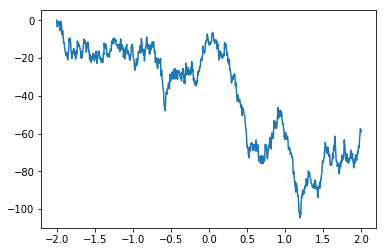

In [117]:
#we need to solve for the weights w such that
#X_poly_basis.dot(w) = Y, we'll use the LASSO objective that combines L2 and L1 loss

plt.plot(X_ran,Y)
plt.show()

In [118]:
#import the LASSO solver
from sklearn import linear_model

#we'll use the built in Lasso solver in Scikit-learn
#the input value alpha is the regularization constant lambda as we've written above
#don't mess with the input options other than alpha, for example, fit_intercept is default to be true
#and assumes you didn't include the bias term in your basis function
lasso_regressor = linear_model.Lasso(alpha=100, fit_intercept=False, tol=0.01, max_iter=10000)

#this fits the outputs Y to the polynomial basis of inputs in the range -2 to 2
lasso_regressor.fit(X_poly_basis, Y)

#these are the weights the model learns
w = lasso_regressor.coef_

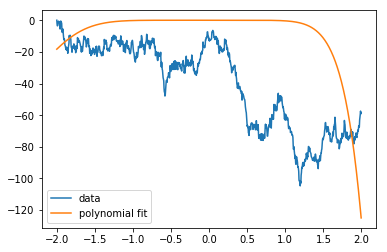

coefficients: 
[-0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.28386668 -0.10622725  0.        ]


In [119]:
#we've used a large regularization constant, alpha=100, notice the model doesn't fit
#very well

plt.plot(X_ran,Y, label="data")
plt.plot(X_ran,X_poly_basis.dot(w), label="polynomial fit")
plt.legend()
plt.show()

print("coefficients: ")
print(w)

For problem \# 2, fit with the LASSO regressor for several values of alpha between 0.001 and 100.0. Plot at least five different polynomial fits like the above for different values of alpha. For each alpha, print the coefficients that it solves for along with the plot and describe what's happening.

In [121]:
#insert your code here

### \# 3

The L1-and L2-norms are special cases of the Lp-norm, which is a family of functions that define a metric space where the data "lives". One way to think of machine learning tasks is transforming that metric space until the data resembles something manageable with simple models, almost like untangling a knot. The Lp-norm for an $n$ dimensional vector $x$ is defined as,

<center>$||x||_{p} = \sum_{i=1}^{n}\sqrt[\leftroot{-2}\uproot{2}p]{|x_{i}|^{p}} $</center>

If we take the limit $p \rightarrow \infty$, then the L-$\infty$ norm gives us a special function. For multiple values of p, plot the unit ball in 2 dimensions, and make a guess as to what the L-$\infty$ norm looks like. The unit ball is the value of the norm for vectors a distance of 1 away from the origin according to the norm. Below are examples for the 1 and 2 norms. If p is too large, you won't be able to plot it with the functions I've given, so look at values of p like 3, 4, and 5 and then make a guess.

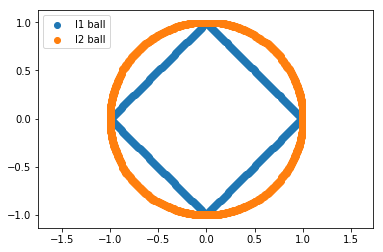

In [122]:
def l1_norm(x):
    out = 0
    for x_i in x:
        out += np.abs(x_i)
    return(out)

def l2_norm(x):
    out = 0
    for x_i in x:
        out += np.power(x_i, 2)
    return(np.sqrt(out))

x_1 = np.arange(-1,1,0.01)
x_2 = np.arange(-1,1,0.01)
tol = 0.01

l1_unit_ball_values = []
l2_unit_ball_values = []

for x_i in x_1:
    for x_j in x_2:
        l1 = l1_norm([x_i, x_j])
        l2 = l2_norm([x_i, x_j])
        if l1 > 1 - tol and  l1 < 1 + tol:   #check to see if the value of the L1 norm is close to 1
            l1_unit_ball_values.append([x_i, x_j])
        if l2 > 1 - tol and l2 < 1 + tol:    #check to see if the value of the L2 norm is close to 1 
            l2_unit_ball_values.append([x_i, x_j])
        
l1_ball = np.asarray(l1_unit_ball_values) #transform the list of vectors/pairs into a numpy array
l2_ball = np.asarray(l2_unit_ball_values)

plt.scatter(l1_ball[:,0], l1_ball[:,1], label="l1 ball")
plt.scatter(l2_ball[:,0], l2_ball[:,1], label="l2 ball")
plt.legend(loc=2)
plt.axis('equal') #this makes the axes the same scale so that the circle isn't elliptical looking
plt.show()

In [123]:
#add your code here, consider writing a more general
#function than l1_norm() or l2_norm() above for the lp_norm

### \# 4

The [Huber loss](https://en.wikipedia.org/wiki/Huber_loss) is another way to deal with the outlier problem and is very closely linked to the LASSO regression loss function. The Huber loss with unit weight is defined as,

<center>$\mathcal{L}_{huber}(y, \hat{y}) = \begin{cases} \frac{1}{2}(y - \hat{y})^{2} & |y - \hat{y}| \leq 1 \\ |y - \hat{y}| - \frac{1}{2} & |y - \hat{y}| > 1 \end{cases}$</center>

In a _single_ figure with three [subplots](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html), plot the values of loss functions defined by the L2-norm, the L1-norm, and the Huber loss. That is, the x-axis should be the value of the error, $e = y - \hat{y}$, and the y-axis should be the value of the loss $\mathcal{L}(y, \hat{y})$. Label each subplot. Describe why is the Huber loss robust to outliers.

In [124]:
#add your code here